In [170]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

# Part 1: Measuring spring constants
For the three (supposedly identical) spring, we're measuring the displacement using a meter stick while increasing mass from 50g to 130g in steps of 20g (5 measurements).

In [171]:
spring_1_mass = np.array([50, 70, 90, 110, 130])*1E-3 # in kg
spring_1_displacement = np.array([14, 19.5, 25, 30.5, 36.25])*1E-2 # in m

In [172]:
spring_1_force = spring_1_mass*9.81 # in N

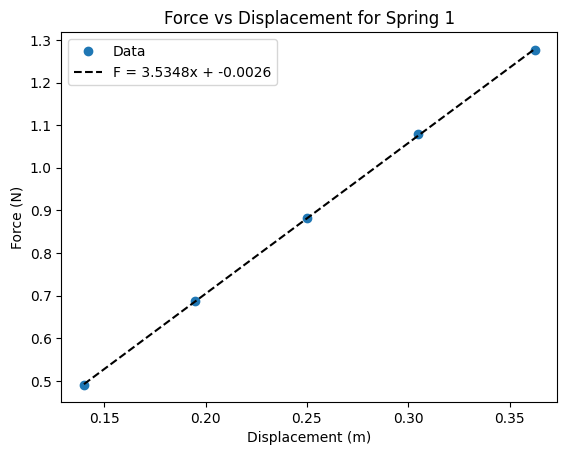

In [173]:
# Plotting the force vs displacement and fit using np.polyfit for spring 1
fit = np.polyfit(spring_1_displacement, spring_1_force, 1)
fit_fn = np.poly1d(fit)
plt.plot(spring_1_displacement, spring_1_force, 'o', label = 'Data')
plt.plot(spring_1_displacement, fit_fn(spring_1_displacement), '--k', label = 'F = {:.4f}x + {:.4f}'.format(fit[0], fit[1]))
plt.xlabel('Displacement (m)')
plt.ylabel('Force (N)')
plt.title('Force vs Displacement for Spring 1')
plt.legend()

In [174]:
# Calculating the spring constant for spring 1
spring_1_k = fit[0]
display(Latex('Spring 1 spring constant: {:.4f} N/m'.format(spring_1_k)))

<IPython.core.display.Latex object>

In [175]:
# Repeat for spring 2
spring_2_mass = np.array([50, 70, 90, 110, 130])*1E-3 # in kg
spring_2_displacement = np.array([14.5, 20.0, 25.75, 31.5, 37])*1E-2 # in m

In [176]:
spring_2_force = spring_2_mass*9.81 # in N

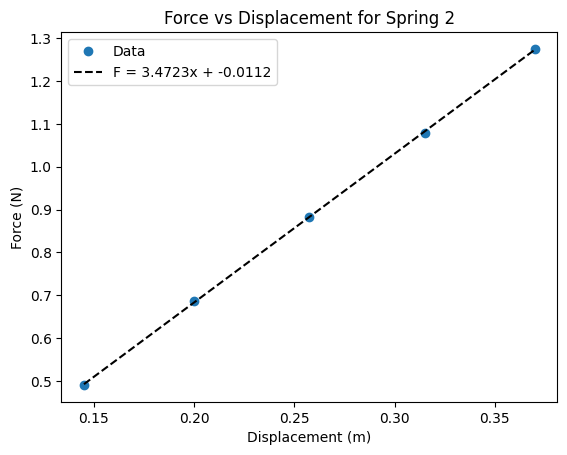

In [177]:
# Plotting the force vs displacement and fit using np.polyfit for spring 2
fit = np.polyfit(spring_2_displacement, spring_2_force, 1)
fit_fn = np.poly1d(fit)
plt.plot(spring_2_displacement, spring_2_force, 'o', label = 'Data')
plt.plot(spring_2_displacement, fit_fn(spring_2_displacement), '--k', label = 'F = {:.4f}x + {:.4f}'.format(fit[0], fit[1]))
plt.xlabel('Displacement (m)')
plt.ylabel('Force (N)')
plt.title('Force vs Displacement for Spring 2')
plt.legend()

In [178]:
# Calculating the spring constant for spring 2
spring_2_k = fit[0]
display(Latex('Spring 2 spring constant: {:.4f} N/m'.format(spring_2_k)))

<IPython.core.display.Latex object>

In [179]:
# Repeat for spring 3
spring_3_mass = np.array([50, 70, 90, 110, 130])*1E-3 # in kg
spring_3_displacement = np.array([13, 18.5, 24, 29.5, 35.25])*1E-2 # in m

In [180]:
spring_3_force = spring_3_mass*9.81 # in N

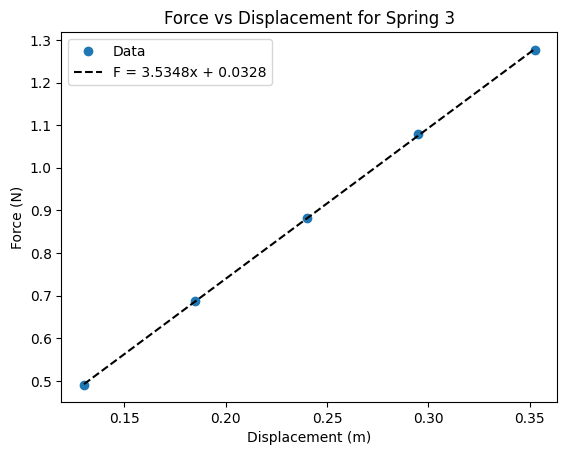

In [181]:
# Plotting the force vs displacement and fit using np.polyfit for spring 3
fit = np.polyfit(spring_3_displacement, spring_3_force, 1)
fit_fn = np.poly1d(fit)
plt.plot(spring_3_displacement, spring_3_force, 'o', label = 'Data')
plt.plot(spring_3_displacement, fit_fn(spring_3_displacement), '--k', label = 'F = {:.4f}x + {:.4f}'.format(fit[0], fit[1]))
plt.xlabel('Displacement (m)')
plt.ylabel('Force (N)')
plt.title('Force vs Displacement for Spring 3')
plt.legend()

In [182]:
# Calculating the spring constant for spring 3
spring_3_k = fit[0]
display(Latex('Spring 3 spring constant: {:.4f} N/m'.format(spring_3_k)))

<IPython.core.display.Latex object>

In [183]:
# List of spring constants
spring_constants = np.array([spring_1_k, spring_2_k, spring_3_k])
display(Latex('Spring constants: {:.4f} N/m, {:.4f} N/m, {:.4f} N/m'.format(spring_constants[0], spring_constants[1], spring_constants[2])))

<IPython.core.display.Latex object>

In [184]:
# Calculating the average spring constant and standard deviation
spring_constant_avg = np.mean(spring_constants)
spring_constant_std = np.std(spring_constants)
display(Latex('Average spring constant: {:.4f} N/m'.format(spring_constant_avg)))
display(Latex('Standard deviation of spring constants: {:.4f} N/m'.format(spring_constant_std)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Part 2: The forced, damped, harmonic oscillator
 - Calculate the period of the oscillator with no driving force
  - Calculate the natural frequency of the oscillator $f_0$ and the natural angular frequency $\omega_0$

In [185]:
# Mass of air carts in kg
air_cart_masses = np.array([207.9, 206.4])*1E-3
air_cart_masses_std = np.array([0.05, 0.05])*1E-3

In [186]:
# Measurements of period of oscillation with no driving force
periods = np.array([1.11, 0.96, 0.89, 1.11, 1.08, 1.09, 0.98, 1.03, 1.37, 1.14]) # in s
period_avg = np.mean(periods)
period_std = np.std(periods)
display(Latex('Average period: {:.4f} s'.format(period_avg)))
display(Latex('Standard deviation of period: {:.4f} s'.format(period_std)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [187]:
# Calculating the natural frequency and angular frequency
natural_frequency = 1/period_avg
natural_angular_frequency = 2*np.pi*natural_frequency
display(Latex('Natural frequency: {:.4f} Hz'.format(natural_frequency)))
display(Latex('Natural angular frequency: {:.4f} rad/s'.format(natural_angular_frequency)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Calculating the theoretical natural frequency and angular frequency


In [188]:
# Calculating the theoretical natural frequency and angular frequency
natural_angular_frequency_theory = np.sqrt(2*spring_constant_avg/air_cart_masses[0])
natural_frequency_theory = natural_angular_frequency_theory/(2*np.pi)
display(Latex('Theoretical natural frequency: {:.4f} Hz'.format(natural_frequency_theory)))
display(Latex('Theoretical natural angular frequency: {:.4f} rad/s'.format(natural_angular_frequency_theory)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Turning on the driving force
- Set driving frequency to 0.5 Hz from predicted resonance frequency
- Increase by 0.1 Hz until withing 0.05 Hz of resonance frequency, then increase by 0.01 Hz.
- Once the resonance frequency is passed by 0.05 Hz, increase by 0.1 Hz for 4 or 5 measurements.

In [189]:
# Theoretical resonance frequency
resonance_frequency_theory = natural_frequency_theory
display(Latex('Theoretical resonance frequency: {:.4f} Hz'.format(resonance_frequency_theory)))

<IPython.core.display.Latex object>

In [190]:
# Measured resonance frequency
driving_frequency = np.array([0.410, 0.513, 0.607, 0.708, 0.805, 0.874, 0.883, 0.895, 0.911, 0.920]) # in Hz
oscillation_amplitude = np.array([0.3, 0.35, 0.45, 0.5, 0.9, 3.5, 4.5, 11.0, 11.5, 11.5])*1E-2 # in m